In [36]:
#Importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
# Cargar el DataFrame limpio
crimes_df = pd.read_csv("./Guardados/clean_crime_rate.csv")

# Muestreo de las columnas del DataFrame
crimes_df.head() 

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,lat,lon
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,41.0,...,36.0,43.0,30.0,40.0,40.0,34.0,43.0,26.0,21.8818,-102.2916
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,201.0,...,121.0,166.0,160.0,151.0,178.0,133.0,121.0,107.0,21.8818,-102.2916
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,19.0,...,13.0,19.0,12.0,15.0,19.0,22.0,10.0,8.0,21.8818,-102.2916
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),1.0,...,3.0,0.0,0.0,3.0,2.0,1.0,4.0,2.0,21.8818,-102.2916
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.8818,-102.2916


In [14]:
# Crear una nueva columna 'Total_Delitos' que sume los delitos de todos los meses
crimes_df['Total_Delitos'] = crimes_df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)

# Ver el resultado
print(crimes_df[['Año', 'Entidad', 'Clave_Ent','Total_Delitos']])


        Año         Entidad  Clave_Ent  Total_Delitos
0      2015  Aguascalientes          1          419.0
1      2015  Aguascalientes          1         1860.0
2      2015  Aguascalientes          1          179.0
3      2015  Aguascalientes          1           22.0
4      2015  Aguascalientes          1            2.0
...     ...             ...        ...            ...
82939  2023       Zacatecas         32            2.0
82940  2023       Zacatecas         32          157.0
82941  2023       Zacatecas         32           58.0
82942  2023       Zacatecas         32          181.0
82943  2023       Zacatecas         32         1115.0

[82944 rows x 4 columns]


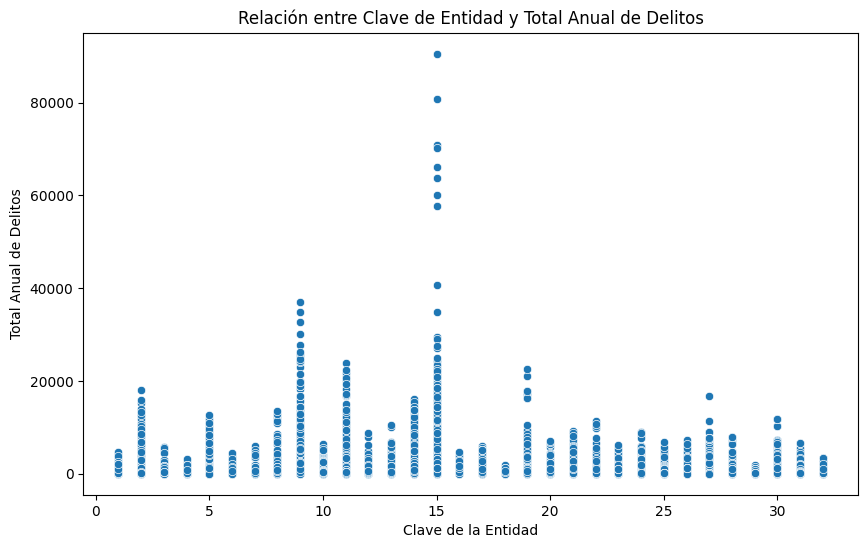

In [53]:
X = crimes_df[['Clave_Ent']]    # Clave de la entidad (variable independiente)
y = crimes_df['Total_Delitos']    # Total de delitos (variable dependiente)

# Crear una gráfica de dispersión para ver la relación entre SalePrice y GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Clave_Ent', y='Total_Delitos', data=crimes_df)
plt.title('Relación entre Clave de Entidad y Total Anual de Delitos')
plt.ylabel('Total Anual de Delitos')
plt.xlabel('Clave de la Entidad')
plt.show()

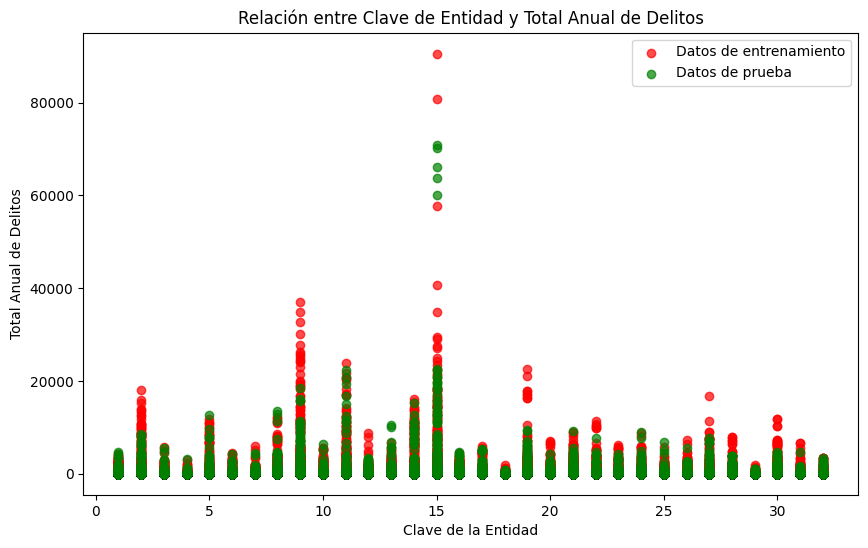

In [56]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una gráfica de dispersión para ver la relación entre Clave de Entidad y Total Anual de Delitos
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Datos de entrenamiento', color='r', alpha=0.7)
plt.scatter(X_test, y_test, label='Datos de prueba', color='g', alpha=0.7)
plt.legend()
plt.title('Relación entre Clave de Entidad y Total Anual de Delitos')
plt.xlabel('Clave de la Entidad')
plt.ylabel('Total Anual de Delitos')
plt.show()


In [59]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predicciones
y_pred = model.predict(X_test)
# Predicción para una clave de entidad específica (por ejemplo, Clave_Ent=10)
prediccion = model.predict(np.array([[1]]))
print(f"La predicción para la clave de entidad 1 Aguascalientes es {prediccion[0]:.2f} delitos anuales.")


La predicción para la clave de entidad 1 Aguascalientes es 260.28 delitos anuales.


c:\Users\renis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


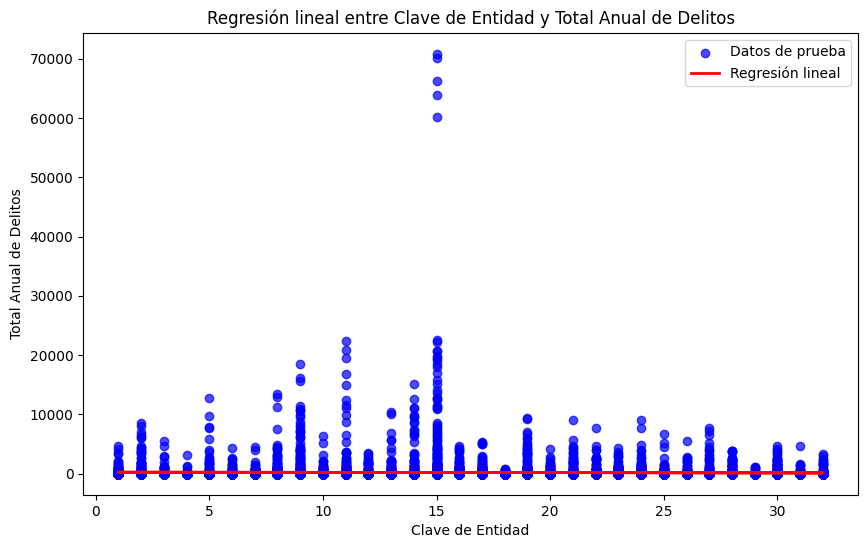

In [63]:
# Crear una nueva figura
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
plt.scatter(X_test, y_test, label='Datos de prueba', color='b', alpha=0.7)

# Graficar la línea de regresión
plt.plot(X_test, y_pred, label='Regresión lineal', color='r', linewidth=2)

plt.legend()
plt.title('Regresión lineal entre Clave de Entidad y Total Anual de Delitos')
plt.xlabel('Clave de Entidad')
plt.ylabel('Total Anual de Delitos')
plt.show()

In [64]:
print(f'Pendiente (β1): {model.coef_[0]}')
print(f'Intersección (β0): {model.intercept_}')

Pendiente (β1): -3.812696254914991
Intersección (β0): 264.0937596430181


In [47]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 2407529.6115631904
RMSE: 1551.6216070818266


In [65]:
# Predicción para una clave de entidad específica (por ejemplo, Clave_Ent=10)
prediccion = model.predict(np.array([[1]]))
print(f"La predicción para la clave de entidad 1 Aguascalientes es {prediccion[0]:.2f} delitos anuales.")

La predicción para la clave de entidad 1 Aguascalientes es 260.28 delitos anuales.


c:\Users\renis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
